<a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/HuggingFace/CLASIFICADOR_IMAGENES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image classification

La clasificación de imágenes es fundamental en la visión por computadora y el aprendizaje automático. Implica etiquetar imágenes en categorías específicas utilizando técnicas de procesamiento de imágenes y modelos de aprendizaje automático.

Documentación:

* **Transformers** - https://huggingface.co/docs/transformers/v4.32.1/en/index

* **Modelo Google/ViT** - https://huggingface.co/google/vit-base-patch16-224

* **ImageNet DataSet** - https://www.image-net.org/download.php

* **ImageNet** - https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

* **PIL** - https://pypi.org/project/Pillow/

* **requests** - https://pypi.org/project/requests/

### **Ejemplo**:

>Para nuestro ejemplo utilizaremos de la librería **Transformers** el **Modelo Google/ViT** pre-entrenado con un DataSet de 14M de imágenes, pre-clasificadas en mas de 21k clases en resolución de 224x224.
>
>Este Modelo es una versión fine-tuneada del **DataSet de Clases de ImageNet** con 1M de imágenes pre-clasificadas en 1k clases en resolución de 224x224.


*Mas información en:*

https://huggingface.co/google/vit-base-patch16-224

In [ ]:
#@title **Instalador Principal**

#@markdown # **Importante**
#@markdown **Recuerda instalar primero la librería principal junto con todos sus componentes.**

from IPython.display import clear_output

#Instalar el módulo de entornos virtuales venv de python
!apt install python3.10-venv

#Crear nuestro entorno virtual
!python -m venv .env

#Activamos nuestro entorno virtual
!source .env/bin/activate

#Instalamos todas las dependencias de Transformers necesarias
!pip install transformers
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'
clear_output()

#Realizamos una prueba para verificar que el código funciona
print("Instalación correcta")
!python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('You are an amazing human!'))"

Instalación correcta
2023-09-01 22:08:28.889545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
[{'label': 'POSITIVE', 'score': 0.9998890161514282}]


Imagen lista


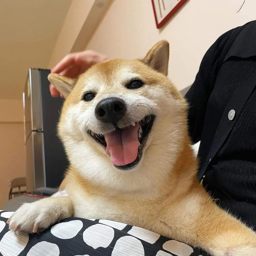

Modelo:	google/vit-base-patch16-224
Procesador:	google/vit-base-patch16-224
Predicción ImageNet Class: Eskimo dog, husky


In [ ]:
#@title **Ejemplo práctico**

try:
  #@markdown 1. Importamos todas las librerías necesarias
  #@markdown para el procesamiento y clasificacion de imágenes
  #@markdown junto con algunas librerías de apoyo
  from transformers import ViTImageProcessor, ViTForImageClassification
  from IPython.display import display
  from PIL import Image
  from io import BytesIO
  import requests

  #@markdown 2. Definimos la ruta de nuestra imagen
  nueva_imagen = "https://scontent.cdninstagram.com/v/t51.2885-15/367993178_321856623616231_4569727558281798286_n.webp?stp=dst-jpg_e35&_nc_ht=scontent.cdninstagram.com&_nc_cat=107&_nc_ohc=t7m8vu4v7D4AX_uB_Vq&edm=APs17CUBAAAA&ccb=7-5&ig_cache_key=MzE3MjcyNDExNTk3MDI1NjAxNg%3D%3D.2-ccb7-5&oh=00_AfAjFv1iaJdKQV2KNw-JmyzbnT3V3clpU0r64_Wi6AgVeg&oe=64F7ECA6&_nc_sid=10d13b" # @param {type:"string"}

  #@markdown 3. Obtenemos la imagen desde internet
  img = requests.get(nueva_imagen, stream=True)
  imagen_prueba = Image.open(img.raw)
  print("Imagen lista")

  #@markdown *Opcional para previsualizar la imagen descargada*
  display_img = True # @param {type:"boolean"}
  img_show = requests.get(nueva_imagen)
  display(Image.open(BytesIO(img_show.content)).resize((256,256)))

  #@markdown 4. Configuramos nuestro procesador y modelo clasificador
  nombre_procesador = "google/vit-base-patch16-224" # @param {type:"string"}
  nombre_modelo = "google/vit-base-patch16-224" # @param {type:"string"}
  procesador = ViTImageProcessor.from_pretrained(nombre_procesador)
  modelo = ViTForImageClassification.from_pretrained(nombre_modelo)
  print(f"Modelo:\t{nombre_modelo}\nProcesador:\t{nombre_procesador}")

  #@markdown 5. Procesamos nuestra imagen e imprimimos la predicción
  inputs = procesador(images=imagen_prueba, return_tensors="pt")
  outputs = modelo(**inputs)
  logits = outputs.logits
  predicted_class_idx = logits.argmax(-1).item()
  print("Predicción ImageNet Class:", modelo.config.id2label[predicted_class_idx])


except Exception as error:
  print(f"No es Chems\n{error}")

#@markdown El modelo realiza una predicción sobre una de las 1000 clases de la base de datos ImageNet